In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel("/content/news_share_data.xlsx")

print(df.shape)

df.head()




(1003, 22)


,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,Business,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,4.636704,7,Tech,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,4.627451,7,Tech,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,2014-04-01,0.525896,4,1,0,5.083665,9,Tech,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,2014-04-01,0.588889,6,9,0,4.336022,7,00000,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000


In [ ]:
df.head()

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,Business,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,4.636704,7,Tech,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,4.627451,7,Tech,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,2014-04-01,0.525896,4,1,0,5.083665,9,Tech,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,2014-04-01,0.588889,6,9,0,4.336022,7,00000,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000


In [ ]:
df.columns

Index(['article_id', 'title', 'text', 'published_date', 'unique_tokens_rate',
       'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel', 'min_avg_key', 'max_avg_key',
       'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares'],
      dtype='object')

In [ ]:
df.columns

Index(['article_id', 'title', 'text', 'published_date', 'unique_tokens_rate',
       'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel', 'min_avg_key', 'max_avg_key',
       'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   article_id                  1003 non-null   int64         
 1   title                       1003 non-null   object        
 2   text                        1003 non-null   object        
 3   published_date              1003 non-null   datetime64[ns]
 4   unique_tokens_rate          1003 non-null   float64       
 5   num_hrefs                   1003 non-null   int64         
 6   num_imgs                    1003 non-null   int64         
 7   num_videos                  1003 non-null   int64         
 8   average_token_length        1003 non-null   float64       
 9   num_keywords                1003 non-null   int64         
 10  data_channel                1003 non-null   object        
 11  min_avg_key                 1003 non-null   float64     

In [ ]:
# Print the columns of your DataFrame
print(df.columns)

# Verify the correct column names and adjust the list accordingly
cols_to_drop = [
    'month no',
    'weekday no',
    'is_weekend',
    'Channel_Entertainment',
    'Channel_Lifestyle',
    'Channel_Others',
    'Channel_Social Media',
    'Channel_Tech'
]

# Drop the specified columns
cols_to_treat = df.drop(columns=cols_to_drop)


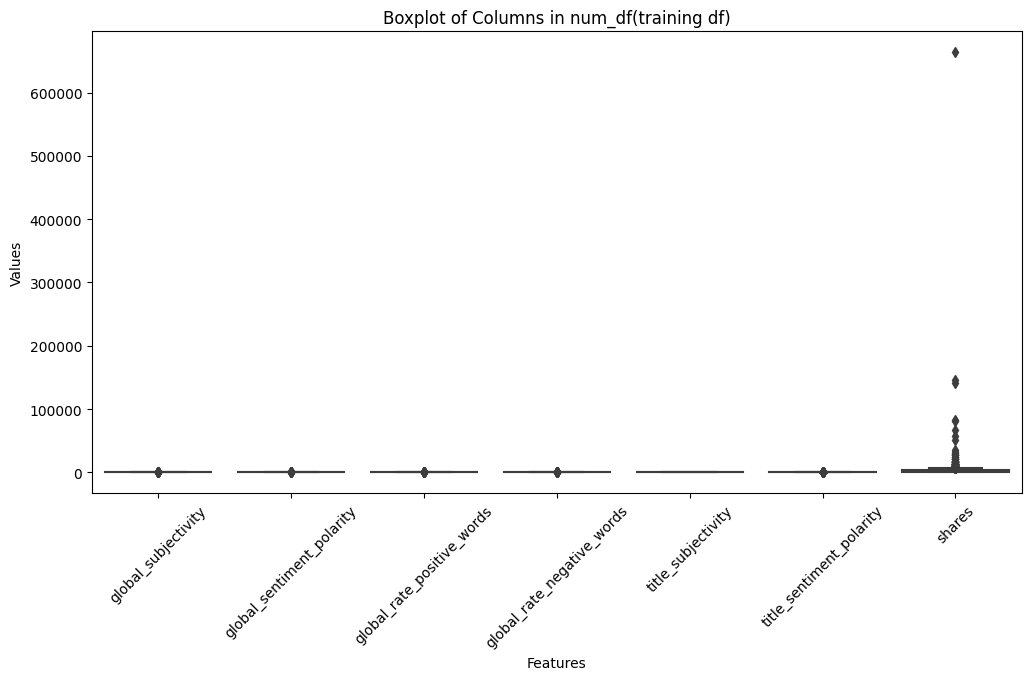

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot( data = df.iloc[:,15:42])

plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in num_df(training df)')
plt.show()

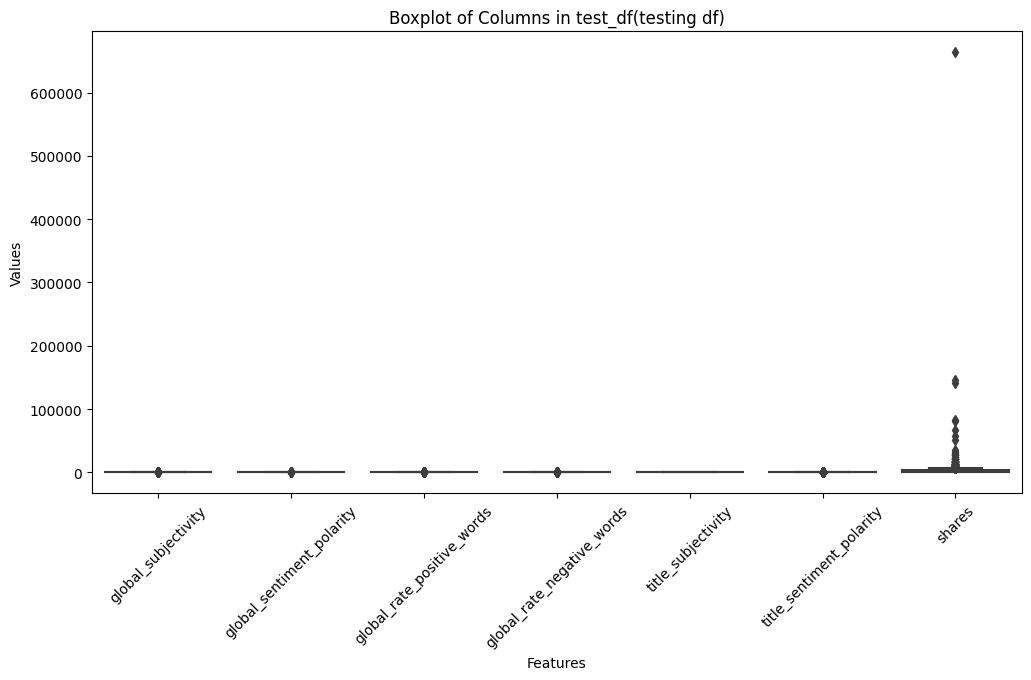

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot( data = df.iloc[:,15:42])

plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in test_df(testing df)')
plt.show()

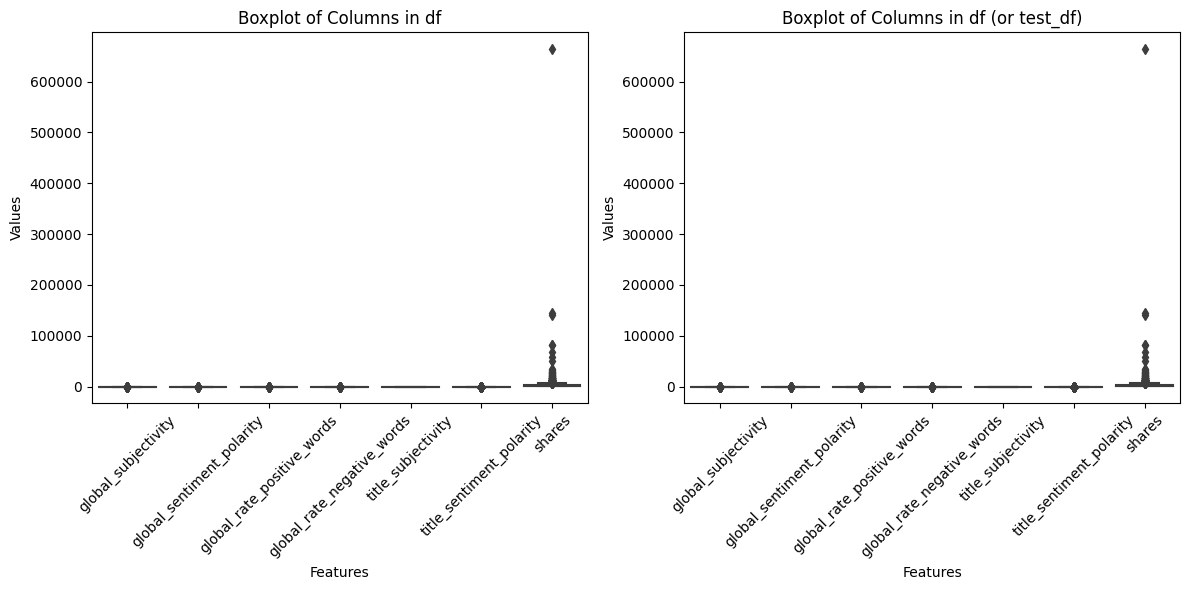

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your test DataFrame from an Excel file (replace 'your_test_file.xlsx' with your actual file name)
df = pd.read_excel("/content/news_share_data.xlsx")

# Assuming 'df' is your main DataFrame containing numerical data
plt.figure(figsize=(12, 6))

# Subplot 1: Boxplot of Columns in df
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(data=df.iloc[:, 15:42])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in df')

# Subplot 2: Boxplot of Columns in test_df (replace 'test_df' with your actual DataFrame)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(data=df.iloc[:, 15:42])  # Assuming you want to plot the same DataFrame for both subplots
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in df (or test_df)')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()




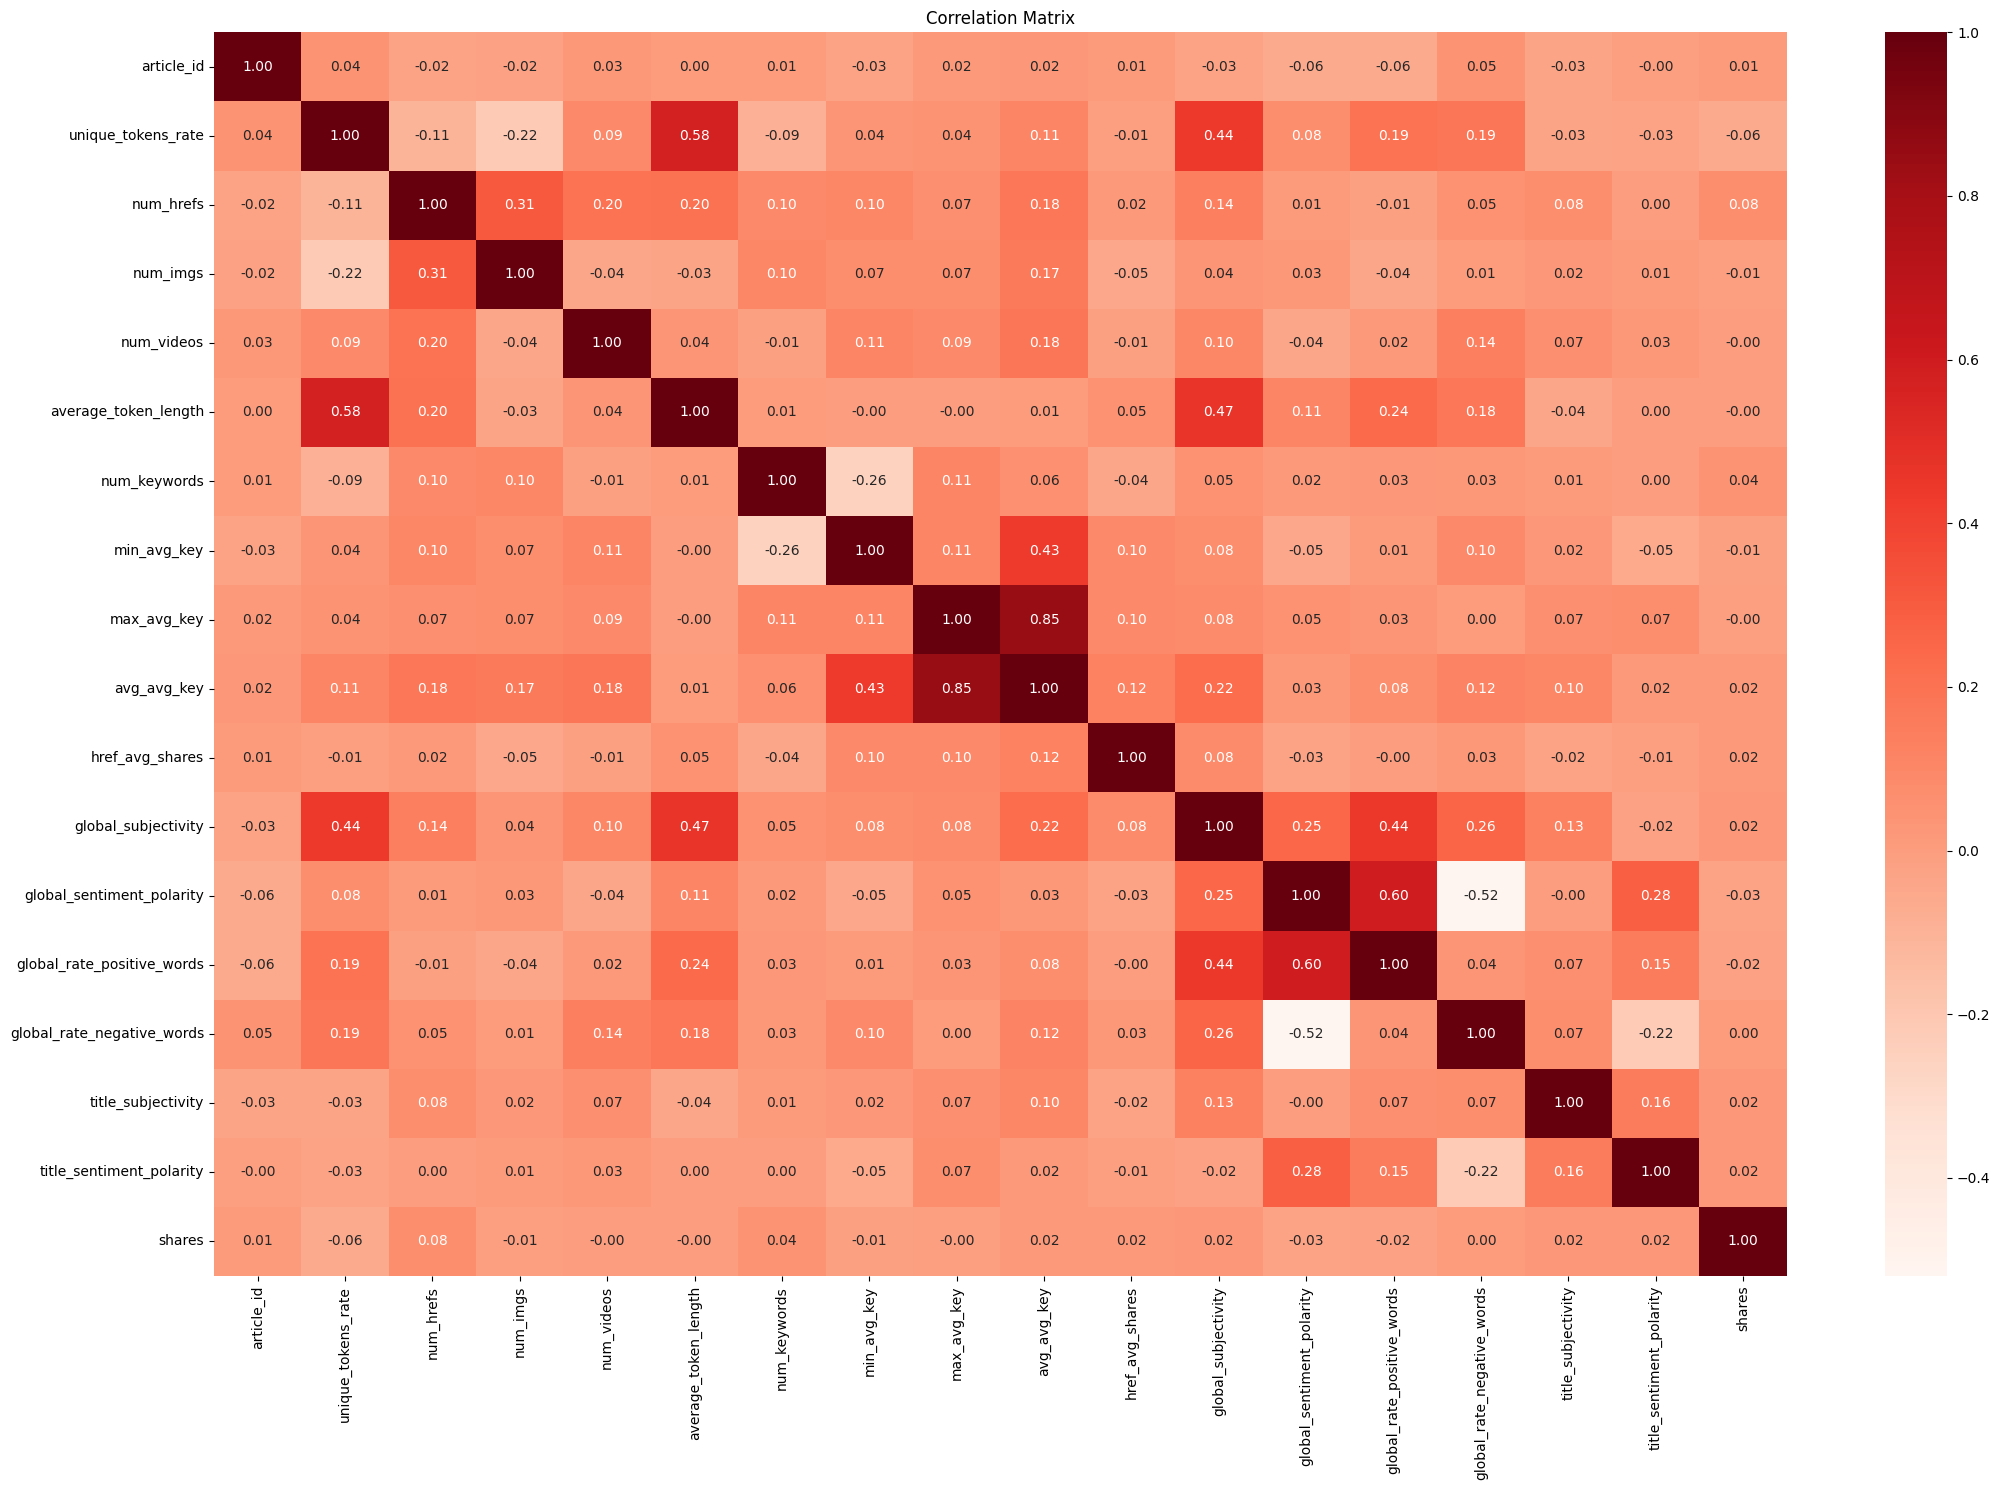

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load or create your DataFrame (replace 'your_file.xlsx' with the actual path)
df = pd.read_excel("/content/news_share_data.xlsx")

# Assuming 'df_treated' is your main DataFrame containing treated data
# Assuming 'df' is your main DataFrame
correlation_matrix = df.corr()

plt.figure(figsize=(22, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [43]:

corr_with_target = correlation_matrix['shares'].sort_values(ascending=False)

top_correlated_features = corr_with_target[1:25]
print(top_correlated_features)


num_hrefs                     0.077955
num_keywords                  0.044015
title_sentiment_polarity      0.024815
global_subjectivity           0.022757
title_subjectivity            0.021480
href_avg_shares               0.018945
avg_avg_key                   0.015171
article_id                    0.012057
global_rate_negative_words    0.004837
average_token_length         -0.000077
num_videos                   -0.001938
max_avg_key                  -0.003706
num_imgs                     -0.008089
min_avg_key                  -0.010040
global_rate_positive_words   -0.019037
global_sentiment_polarity    -0.025610
unique_tokens_rate           -0.060329
Name: shares, dtype: float64


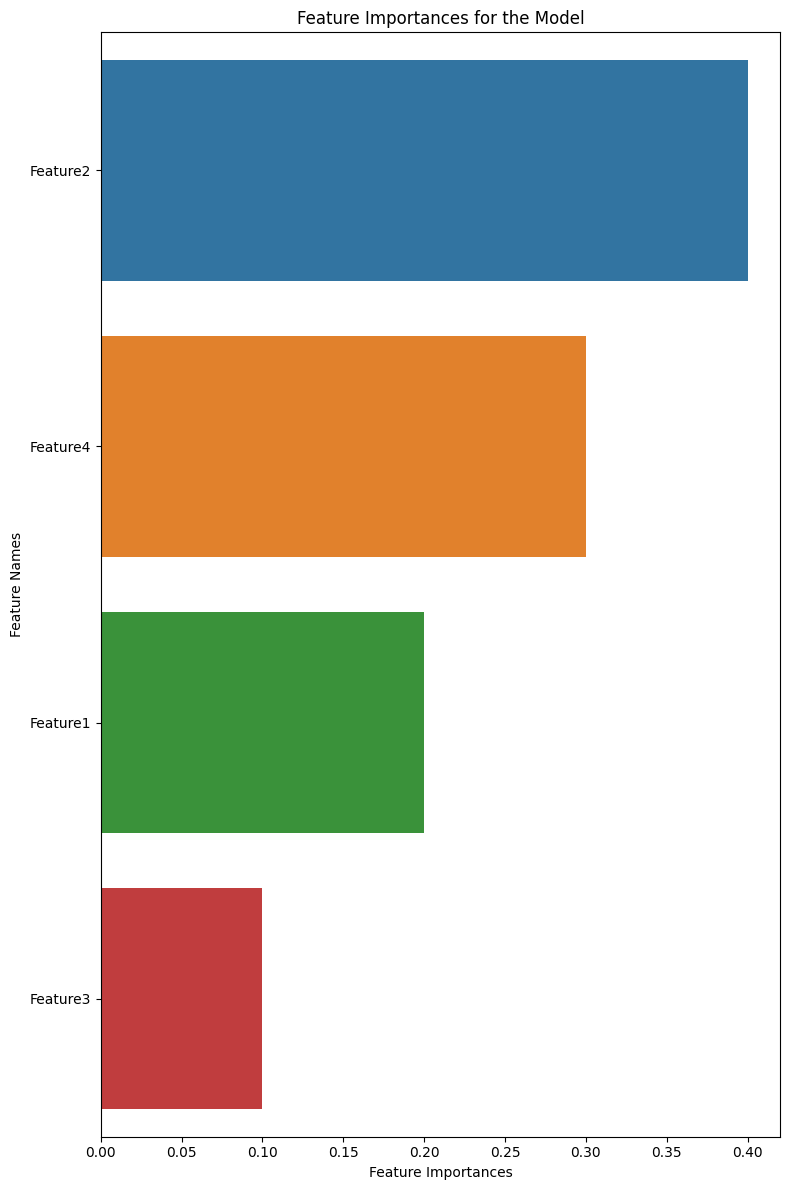

In [45]:
# Assuming you have previously trained a model and obtained feature importances
# Replace the following lines with your actual feature importances and names
feature_importances = [0.2, 0.4, 0.1, 0.3]
feature_names = ['Feature1', 'Feature2', 'Feature3', 'Feature4']

sorted_feature_importances = pd.DataFrame({'Feature Importance': feature_importances, 'Feature Names': feature_names})

# Sort the DataFrame based on feature importances in descending order
sorted_feature_importances = sorted_feature_importances.sort_values(by='Feature Importance', ascending=False)

# Plot the sorted feature importances
plt.figure(figsize=(8, 12))
sns.barplot(data=sorted_feature_importances, x='Feature Importance', y='Feature Names')
plt.xlabel('Feature Importances')
plt.ylabel('Feature Names')
plt.title('Feature Importances for the Model')
plt.tight_layout()
plt.show()


In [46]:
sorted_feature_importances['Feature Names'].tolist()

['Feature2', 'Feature4', 'Feature1', 'Feature3']

In [57]:
import pandas as pd

# Load or create your DataFrame (replace 'your_file.xlsx' with the actual path)
df = pd.read_excel("/content/news_share_data.xlsx")

# Display the column names in your DataFrame
print(df.columns)

# Define the selected columns
selected_cols = ['max_avg_key', 'href_avg_shares', 'unique_tokens_rate', 'global_rate_positive_words',
                  'min_avg_key', 'avg_avg_key', 'num_keywords', 'global_sentiment_polarity',
                  'average_token_length', 'global_subjectivity', 'global_rate_negative_words',
                  'num_videos', 'num_hrefs', 'num_imgs', 'shares']

# Create a DataFrame with the selected columns
selected_df = df[selected_cols]

# Display the head of the selected DataFrame
selected_df.head(2)




Index(['article_id', 'title', 'text', 'published_date', 'unique_tokens_rate',
       'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel', 'min_avg_key', 'max_avg_key',
       'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares'],
      dtype='object')


,max_avg_key,href_avg_shares,unique_tokens_rate,global_rate_positive_words,min_avg_key,avg_avg_key,num_keywords,global_sentiment_polarity,average_token_length,global_subjectivity,global_rate_negative_words,num_videos,num_hrefs,num_imgs,shares
0,4817.692,1833.333,0.640816,0.036735,1459.5,3370.415,5,0.038762,4.579592,0.403762,0.024490,1,5,3,1600
1,3581.094,8500.000,0.549618,0.044944,0.0,2556.367,7,0.180934,4.636704,0.410707,0.003745,0,4,1,1500


- **Setting up the X and y variable for all models to train**

In [58]:
X = selected_df.drop(columns=['shares'])  # Features (excluding 'shares')
y = selected_df[['shares']]  # Target variable
#Creation phase..
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=1234)

print(X.shape)
print(y.shape)

print((X_train.shape,X_test.shape), (y_train.shape,y_test.shape))

(1003, 14)
(1003, 1)
((702, 14), (301, 14)) ((702, 1), (301, 1))


### Removing outliers

In [64]:
import pandas as pd

# Load or create your DataFrame (replace 'your_file.xlsx' with the actual path)
df = pd.read_excel("/content/news_share_data.xlsx")

# Assuming you have already cleaned and preprocessed your DataFrame
# (replace these preprocessing steps with your actual preprocessing code)
df.columns = [col.replace(' ', '_') for col in df.columns]
# Add your other preprocessing steps here

# Define the columns to treat for outliers
cols_to_treat = ['max_avg_key', 'href_avg_shares', 'unique_tokens_rate',
                 'global_rate_positive_words', 'min_avg_key', 'avg_avg_key',
                 'num_keywords', 'global_sentiment_polarity', 'average_token_length',
                 'global_subjectivity', 'global_rate_negative_words', 'num_videos',
                 'num_hrefs', 'num_imgs']

# Check if all specified columns exist in the DataFrame
invalid_cols = set(cols_to_treat) - set(df.columns)
if invalid_cols:
    raise KeyError(f"Invalid column(s): {', '.join(invalid_cols)}")

def treat_outliers_iqr(data, cols_to_treat):
    data_copy = data.copy()

    for col in cols_to_treat:
        q1 = data_copy[col].quantile(0.25)
        q3 = data_copy[col].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        data_copy[col] = data_copy[col].clip(lower=lower_bound, upper=upper_bound)

    return data_copy

# Treat outliers in the DataFrame
df_treated = treat_outliers_iqr(df, cols_to_treat)

# Display the head of the treated DataFrame
print(df_treated.head())



   article_id                                              title  \
0     7014291                 It's Time for a YouTube Competitor   
1     7014327  The Ultimate Roundup of 2014's Biggest April F...   
2     7014304  A Selfie and One Garish Jacket: How the Red So...   
3     7031995    African Telecom Proposes More Diverse Emoticons   
4     6541359  Google to Launch Improved Android Camera App, ...   

                                                text published_date  \
0  It was reported last week that Yahoo is gettin...     2014-03-31   
1  April Fools' marks the day when pranking goes ...     2014-04-01   
2  The 2013 World Series champion Boston Red Sox ...     2014-04-01   
3  Less than a week after Apple pledged to make i...     2014-04-01   
4  Android users may soon see a series of new fea...     2014-04-01   

   unique_tokens_rate  num_hrefs  num_imgs  num_videos  average_token_length  \
0            0.640816          5         3         1.0              4.579592   
1   

In [65]:
targetcol = ['shares']

In [66]:
def treat_outliers_iqr(data, cols_to_treat):
    data_copy = data.copy()

    for col in cols_to_treat:
        q1 = data_copy[col].quantile(0.25)
        q3 = data_copy[col].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        data_copy[col] = data_copy[col].clip(lower=lower_bound, upper=upper_bound)

    return data_copy

# Treat outliers for X_train
y_train = treat_outliers_iqr(y_train, targetcol)

# Treat outliers for X_test
y_test = treat_outliers_iqr(y_test, targetcol)

**`Feature Scaling after splittting to remove Data Leakage`**

In [67]:
from sklearn.preprocessing import MinMaxScaler


scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()


X_train = scaler_X.fit_transform(X_train)
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))


X_test = scaler_X.transform(X_test)
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))


In [68]:
X_train

array([[0.01069212, 0.00372439, 0.62485989, ..., 0.        , 0.0308642 ,
        0.04761905],
       [0.00334892, 0.00773528, 0.81579018, ..., 0.        , 0.04938272,
        0.02380952],
       [0.00350343, 0.00212291, 0.73278765, ..., 0.        , 0.01234568,
        0.01190476],
       ...,
       [0.01529158, 0.00687581, 0.55240674, ..., 0.        , 0.11111111,
        0.10714286],
       [0.06140965, 0.00429738, 0.81579018, ..., 0.        , 0.01234568,
        0.08333333],
       [0.00803669, 0.01069761, 0.64013514, ..., 0.        , 0.04320988,
        0.02380952]])

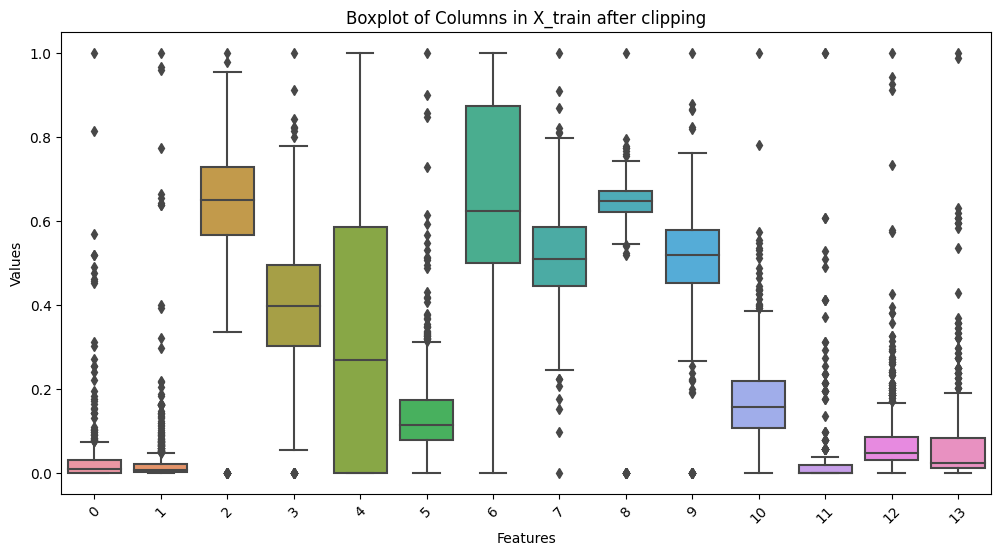

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot( data = X_train)

plt.xticks(rotation=45)
plt.xlabel('Features')

plt.ylabel('Values')
plt.title('Boxplot of Columns in X_train after clipping')
plt.show()

In [70]:
'''plt.figure(figsize=(12, 6))
sns.boxplot( data = X_train)

plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in X_test before clipping')
plt.show()'''

"plt.figure(figsize=(12, 6))\nsns.boxplot( data = X_train)\n\nplt.xticks(rotation=45)\nplt.xlabel('Features')\nplt.ylabel('Values')\nplt.title('Boxplot of Columns in X_test before clipping')\nplt.show()"

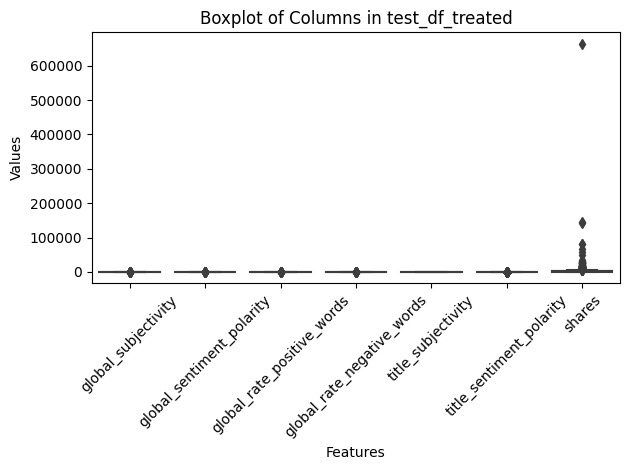

In [75]:
# Replace 'your_test_df_treated.csv' with the actual path to your treated test data
test_df_treated =  pd.read_excel("/content/news_share_data.xlsx")

# Now you can use test_df_treated in your code
sns.boxplot(data=test_df_treated.iloc[:, 15:42])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in test_df_treated')

plt.tight_layout()
plt.show()


In [78]:
# Assuming X_train and y_train are your training features and target variable
from sklearn.ensemble import ExtraTreesRegressor

# Create an instance of the ExtraTreesRegressor
choose = ExtraTreesRegressor()

# Fit the model using your training data
choose.fit(X_train, y_train)


ExtraTreesRegressor()

In [121]:
#selected_cols of train_df
selected_testdf = test_df_treated[selected_cols]
selected_testdf.head(2)

,max_avg_key,href_avg_shares,unique_tokens_rate,global_rate_positive_words,min_avg_key,avg_avg_key,num_keywords,global_sentiment_polarity,average_token_length,global_subjectivity,global_rate_negative_words,num_videos,num_hrefs,num_imgs,shares
0,4817.692,1833.333,0.640816,0.036735,1459.5,3370.415,5,0.038762,4.579592,0.403762,0.024490,1,5,3,1600
1,3581.094,8500.000,0.549618,0.044944,0.0,2556.367,7,0.180934,4.636704,0.410707,0.003745,0,4,1,1500


In [85]:

J = selected_testdf.drop(columns = 'shares')
k = selected_testdf['shares']
from sklearn.model_selection import train_test_split
J_train, J_test, k_train, k_test = train_test_split(J, k, test_size=0.3, random_state=2)

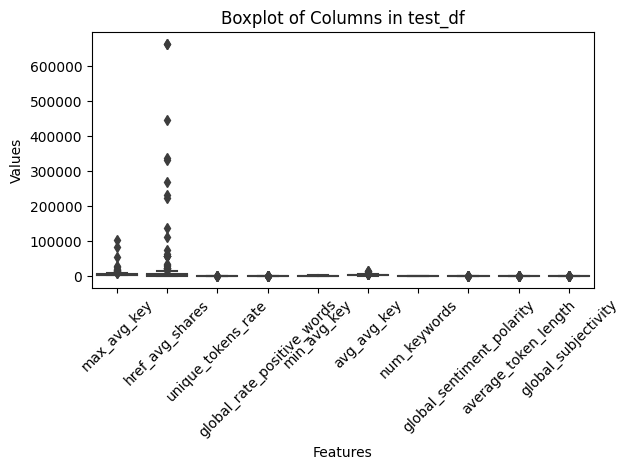

In [86]:
sns.boxplot(data=J_test.iloc[:, 0:10])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in test_df')


plt.tight_layout()
plt.show()

In [122]:
import pandas as pd

import pandas as pd

# Assuming you have loaded or created your DataFrame
df = pd.read_excel("/content/news_share_data.xlsx")

# Define the list of columns to treat
cols2treat = ['max_avg_key', 'href_avg_shares', 'avg shares daily', 'unique_tokens_rate',
              'global_rate_positive_words', 'min_avg_key', 'avg_avg_key', 'num_keywords',
              'global_sentiment_polarity', 'verb_count_title', 'average_token_length',
              'global_subjectivity', 'title_readability', 'global_rate_negative_words',
              'num_videos', 'noun_count_title', 'num_hrefs', 'num_imgs']

# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(' ', '_')

def treat_outliers_iqr(num, col):
    q1 = num[col].quantile(0.25)
    q3 = num[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    num[col] = num[col].clip(lower=lower_bound, upper=upper_bound)  # clipping every outlier
    return num

# Loop through the columns to treat outliers
for col in cols2treat:
    if col in df.columns:
        df = treat_outliers_iqr(df, col)
    else:
        print(f"Column '{col}' not found in the DataFrame.")

# Display the distribution after outlier treatment
print("\nDistribution (after outlier treatment using IQR method):")
print(df.describe())





Column 'avg shares daily' not found in the DataFrame.
Column 'verb_count_title' not found in the DataFrame.
Column 'title_readability' not found in the DataFrame.
Column 'noun_count_title' not found in the DataFrame.

Distribution (after outlier treatment using IQR method):
         article_id  unique_tokens_rate    num_hrefs     num_imgs  \
count  1.003000e+03         1003.000000  1003.000000  1003.000000   
mean   6.915159e+06            0.531859    10.165503     4.276171   
std    4.823885e+05            0.099559     7.667786     5.114117   
min    2.195051e+06            0.271954     0.000000     0.000000   
25%    7.006102e+06            0.466751     4.000000     1.000000   
50%    7.013065e+06            0.533118     8.000000     2.000000   
75%    7.027570e+06            0.596615    14.000000     7.000000   
max    7.041291e+06            0.791412    29.000000    16.000000   

        num_videos  average_token_length  num_keywords  min_avg_key  \
count  1003.000000           100

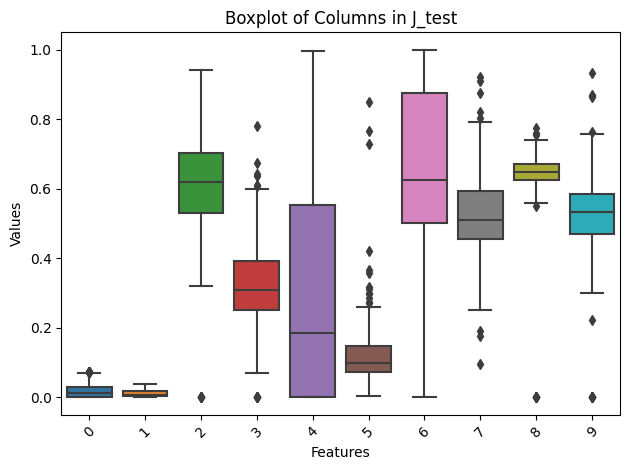

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming J_test is a NumPy array
J_test_df = pd.DataFrame(J_test)

# Create a boxplot
sns.boxplot(data=J_test_df.iloc[:, 0:10])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in J_test')

plt.tight_layout()
plt.show()


In [108]:
from sklearn.preprocessing import MinMaxScaler

scaler_J = MinMaxScaler()
scaler_k = MinMaxScaler()

J_train = scaler_J.fit_transform(J_train)
k_train = scaler_k.fit_transform(k_train.reshape(-1, 1))  # Remove .values

J_test = scaler_J.transform(J_test)
k_test = scaler_k.transform(k_test.reshape(-1, 1))  # Remove .values



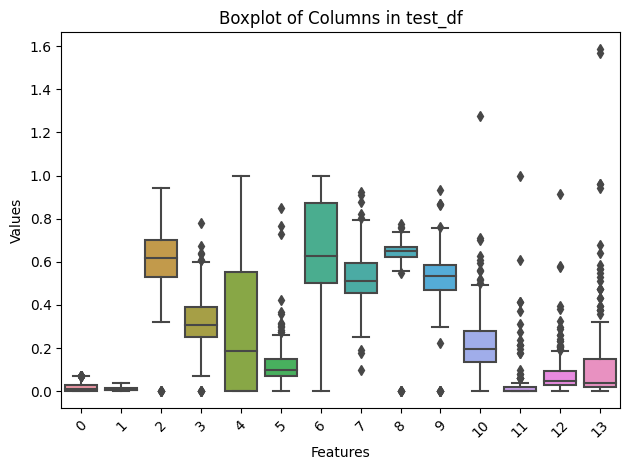

In [110]:
sns.boxplot(data=J_test)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in test_df')


plt.tight_layout()
plt.show()

## 5.2 Random Forest Regressor


In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [112]:
rf_regressor.score(X_train, y_train)

0.8629944926736252

In [113]:
rf_regressor.score(J_test,k_test)

-1587.5037272286777

In [114]:
y_pred_rf = rf_regressor.predict(J_test)

In [115]:
from sklearn.metrics import r2_score
#scoring
r2 = r2_score(k_test, y_pred_rf)
print(f'R2 score: {r2}')

R2 score: -1587.5037272286777


In [116]:
import pickle

with open('new_news_share.pkl', 'wb') as file:
    pickle.dump(rf_regressor, file)

In [117]:
model77= open('new_news_share.pkl', 'rb')
newsgive = pickle.load(model77)

In [119]:
import os
import pickle

# Create the 'model' directory if it doesn't exist
model_dir = 'model/'
os.makedirs(model_dir, exist_ok=True)

# Save the model
with open('model/new_news_share.pkl', 'wb') as file:
    pickle.dump(rf_regressor, file)


In [120]:
model77= open('model/new_news_share.pkl', 'rb')
newsgive = pickle.load(model77)

predictedmodel = newsgive.predict(J_test)

metrics.r2_score(k_test, predictedmodel)

-1587.5037272286777